In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
seeds = pd.read_csv(r"C:\Users\Mothm\Downloads\seeds_dataset (1).txt", header=None, delim_whitespace=True)

In [29]:
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [30]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [31]:
seeds.columns = ['Area',
'Perimeter',
'Compactness',
'Kernel Length',
'Kernel Width',
'Asymmetry coeffecient',
'Kernel Groove Length',
'Kernel Class']
seeds.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeffecient,Kernel Groove Length,Kernel Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [32]:
seeds.describe(include= 'all' ).round(2)
#The count shows that there is no Null values

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeffecient,Kernel Groove Length,Kernel Class
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41,2.00
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49,0.82
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52,1.00
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04,1.00
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22,2.00
75%,17.30,15.72,0.89,5.98,3.56,4.77,5.88,3.00
max,21.18,17.25,0.92,6.68,4.03,8.46,6.55,3.00


In [33]:
print(seeds.groupby('Kernel Class')['Area'].mean().round(2))
print('\n')
print(seeds.groupby('Kernel Class')['Perimeter'].mean().round(2))
#Kernels under 1 on average have about the same area and perimeter

Kernel Class
1    14.33
2    18.33
3    11.87
Name: Area, dtype: float64


Kernel Class
1    14.29
2    16.14
3    13.25
Name: Perimeter, dtype: float64


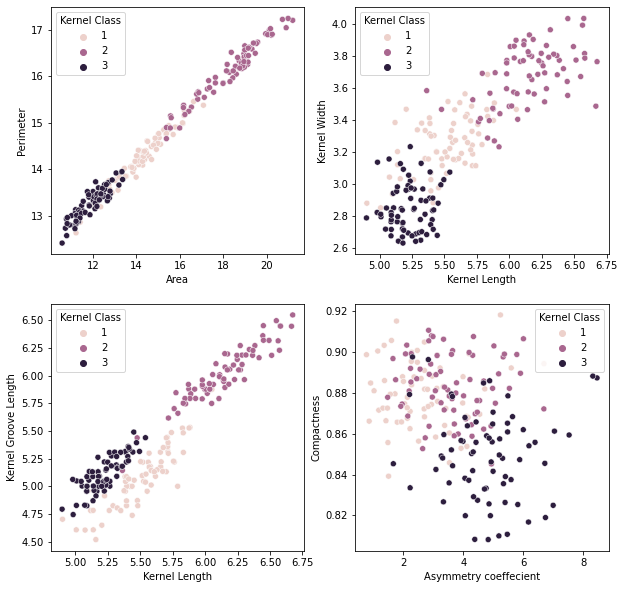

In [34]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.ravel()
sns.scatterplot(data=seeds, x='Area', y='Perimeter', hue='Kernel Class', ax=ax[0])
sns.scatterplot(data=seeds, x='Kernel Length', y='Kernel Width', hue='Kernel Class', ax=ax[1])
sns.scatterplot(data=seeds, x='Kernel Length', y='Kernel Groove Length', hue='Kernel Class', ax=ax[2])
sns.scatterplot(data=seeds, x='Asymmetry coeffecient', y='Compactness', hue='Kernel Class', ax=ax[3]);



 Compactness and Asymmetry for Kernals under classification 3 varies wildly. Kernel Class 1 tends to gravitate towards the left and are less asymmetrical but more compact. 

 Kernels in group 2 are the largest of all 3 groups and trump the other 2 in almost every aspect, Area, Width, Perimeter and Length. Asymmetry Coeffecient is the only one which doesn't have a specific

 Finally, Kernels in class 3 seem to be the smallest in general, Class 1 are medium sized, and Class 2 are the biggest with the highest Width, Length, Perimeter and Area

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
#Data Preprocessing. Dropping the seeds class column to see if Kmeans can accurately group them up without it
seeds = seeds.drop(columns=['Kernel Class'])
scaler = StandardScaler()
scl_seeds = scaler.fit_transform(seeds)


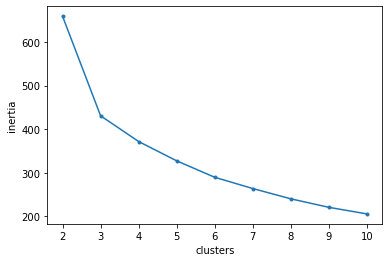

In [37]:
inertias = []
#Loop through values to find best amount of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scl_seeds)
    inertias.append(kmeans.inertia_)
#score viz
plt.plot(range(2,11), inertias, marker='.')
plt.xlabel('clusters')
plt.ylabel('inertia');

Text(0, 0.5, 'Silouhette Score')

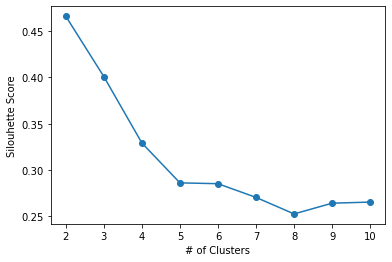

In [38]:
#Elbow of 3, lets try silouhette scores to be sure
sil_score = []
for i in range (2,11):
    kmeans=KMeans(n_clusters= i)
    kmeans.fit(scl_seeds)
    sil_score.append(silhouette_score(scl_seeds, kmeans.labels_))

plt.plot(range(2,11), sil_score, marker = 'o')
plt.xlabel('# of Clusters')
plt.ylabel('Silouhette Score')


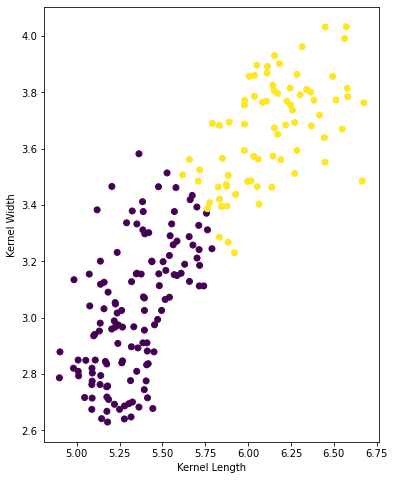

In [39]:
#Silhouette score said 2 so lets do clusters for both, starting with 2
kmeans2 = KMeans(n_clusters=2)
kmeans3 = KMeans(n_clusters=3)

kmeans2.fit(scl_seeds)

seeds['labels'] = kmeans2.labels_
fig, ax = plt.subplots(figsize=(6,8))
ax.scatter(seeds['Kernel Length'], seeds["Kernel Width"], c=seeds['labels'])
ax.set_xlabel('Kernel Length')
ax.set_ylabel('Kernel Width');

In [40]:
#printing part of the data to see what has been appended & how split the values are
print(seeds['labels'].head(10))
print(seeds['labels'].value_counts())

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    1
9    1
Name: labels, dtype: int32
0    133
1     77
Name: labels, dtype: int64


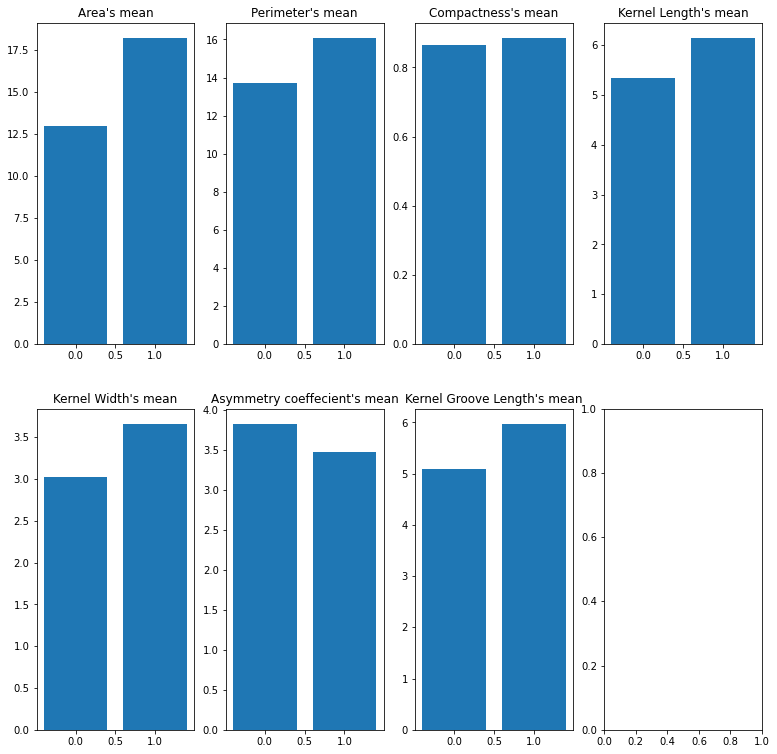

In [41]:
#Groupby columns and clusters
clus_group = seeds.groupby('labels', as_index=False).mean()

fig, ax = plt.subplots(2,4, figsize=(13,13))
ax = ax.ravel()

for i, col in enumerate(clus_group.columns[1:]):
    ax[i].bar(clus_group['labels'], clus_group[col])
    ax[i].set_title(f"{col}'s mean")

Values in Cluster 1 have a lower average in most features save for Asymmetry coeffecient. They are most likely to be seeds from Kernel Class 3 as these lower numbers and averages align with their positions on previous data viz

Meanwhile Cluster 2 has higher values and more values in general, and thus are highly likely to encompass Seeds under Kernel class 1 and 2, although it is possible some still fall under class 3 due to the highest values on some features still align on the medians of previous charts.

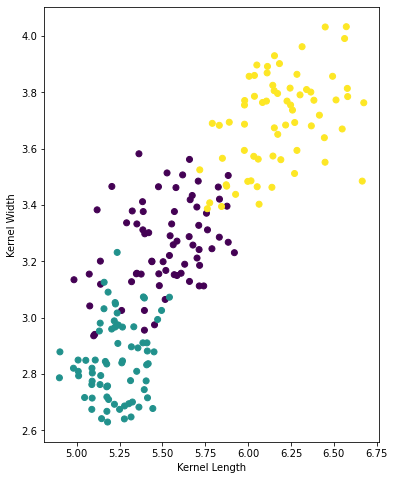

In [79]:
kmeans3.fit(scl_seeds)
seeds['labels']= kmeans3.labels_

#Plot a data viz with 3 clusters/
fig, ax = plt.subplots(figsize=(6,8))
ax.scatter(seeds['Kernel Length'], seeds["Kernel Width"], c=seeds['labels'])
ax.set_xlabel('Kernel Length')
ax.set_ylabel('Kernel Width');

In [43]:
#The results seem almost identical to an earlier data viz
#Testing this by printing out the prediction of the
kmeans3.fit_predict(scl_seeds)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

Kmeans with 3 clusters can almost 100% accurately predict the original kernel classes. It seems to struggle the most with Kernel class 1 due to it being the class of seed that gravitate towards the middle in terms of values amongst all the datapoints.

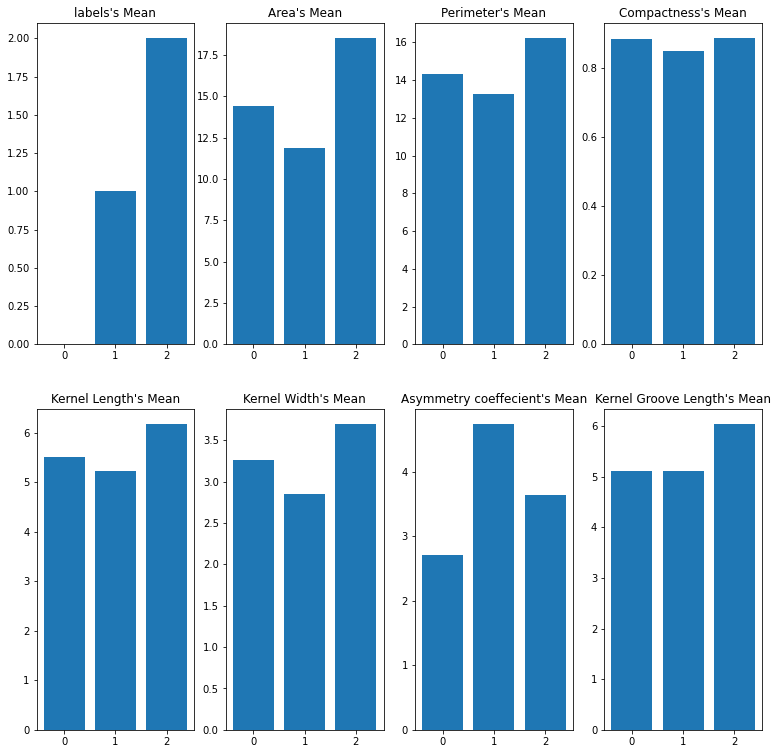

In [84]:
clus_group = seeds.groupby('labels', as_index=False).mean()
fig, ax = plt.subplots(2,4, figsize=(13,13))
ax = ax.ravel()

for i, col in enumerate(clus_group.columns[0:]):
    ax[i].bar(clus_group['labels'], clus_group[col])
    ax[i].set_title(f"{col}'s Mean")

Cluster 1 has value points that tend to be in the middle thus making them most likely to be seeds from Kernel Class 1 as these tend to fall in the middle or median of data points, although as stated above may contain a slight mix of 2 and 3 as well

Cluster 3 has the highest values in most everything save for Asymmetry Coeffcient and again encompasses Seeds most likely from Kernel Class 2

Cluster 2 is has the smallest values and will usually have Seeds under Kernel class 3 by process of elimination.